### Загрузка библиотек, данных. Изучение датасета

In [113]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
dat = pd.read_csv('Домашнее задание.xls - data.csv')
dat.head()

,Дата,Пользователи,Новые пользователи,Доля новых пользователей,Количество платящих пользователей,Количество платящих пользователей.1,Количество покупок,Количество покупок.1,Количество покупок на платящего пользователя,"Выручка, RUB","Средняя выручка на пользователя, RUB","Средняя выручка на платящего пользователя, RUB",Вернувшиеся,"Выручка, RUB","CR воронки покупок, %",Ошибки,CSI
0,12/31/2017,"23,095.00","1,603.00",7%,"1,828.00",1%,"2,309.00",1%,1.26,0.006339,137.54 ₽,"1,737.74 ₽","21,492.00","3,176,584.00 ₽",19.00,"18,854.00",82.0
1,12/30/2017,"29,918.00","2,116.00",7%,"2,727.00",1%,"3,413.00",1%,1.25,0.007972,133.54 ₽,"1,465.03 ₽","27,802.00","3,995,131.00 ₽",19.00,"17,506.00",88.0
2,12/29/2017,"38,953.00","3,029.00",8%,"4,219.00",2%,"5,142.00",1%,1.22,0.013854,178.23 ₽,"1,645.57 ₽","35,924.00","6,942,663.00 ₽",18.00,"10,910.00",88.0
3,12/28/2017,"41,326.00","3,228.00",8%,"4,710.00",2%,"5,732.00",1%,1.22,0.015377,186.47 ₽,"1,636.08 ₽","38,098.00","7,705,928.00 ₽",17.00,"17,235.00",85.0
4,12/27/2017,"34,148.00","2,199.00",6%,"3,018.00",2%,"3,713.00",1%,1.23,0.009173,134.61 ₽,"1,523.06 ₽","31,949.00","4,596,582.00 ₽",13.00,"14,190.00",88.0


In [89]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Дата                                             125 non-null    object 
 1    Пользователи                                    125 non-null    object 
 2    Новые пользователи                              125 non-null    object 
 3   Доля новых пользователей                         125 non-null    object 
 4   Количество платящих пользователей                125 non-null    object 
 5   Количество платящих пользователей.1              125 non-null    object 
 6   Количество покупок                               125 non-null    object 
 7   Количество покупок.1                             125 non-null    object 
 8   Количество покупок на платящего пользователя     125 non-null    float64
 9   Выручка, RUB                    

### Форматирование датасета в пригодный для анализа вид:

In [90]:
### форматирование дат
dat['Дата'] = pd.to_datetime(dat['Дата'], dayfirst = True)
dat['Дата'] = pd.to_datetime(dat['Дата'], dayfirst = True, format = '%Y%m%d')

C:\Users\Орлан\AppData\Local\Temp\ipykernel_18396\3913607565.py:2: UserWarning: Parsing '12/31/2017' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dat['Дата'] = pd.to_datetime(dat['Дата'], dayfirst = True)
C:\Users\Орлан\AppData\Local\Temp\ipykernel_18396\3913607565.py:2: UserWarning: Parsing '12/30/2017' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dat['Дата'] = pd.to_datetime(dat['Дата'], dayfirst = True)
C:\Users\Орлан\AppData\Local\Temp\ipykernel_18396\3913607565.py:2: UserWarning: Parsing '12/29/2017' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dat['Дата'] = pd.to_datetime(dat['Дата'], dayfirst = True)
C:\Users\Орлан\AppData\Local\Temp\ipykernel_18396\3913607565.py:2: UserWarning: Parsing '12/28/2017' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dat['Дата'] = p

In [91]:
def convert_commas(value):
    """Преобразует данные в float:
    - удаляет ','
    """
    new_value = value.replace(',', '')
    return float(new_value)

In [92]:
### выбираем колонки с запятыми
columns = dat.columns
numeric_columns = columns[[1, 2, 4, 6, 12, 15]]
numeric_columns

Index([' Пользователи', ' Новые пользователи',
       'Количество платящих пользователей', 'Количество покупок',
       'Вернувшиеся', ' Ошибки'],
      dtype='object')

In [93]:
### удаление запятых и приведение в тип float
for col in numeric_columns:
    dat[col] = dat[col].apply(convert_commas)

In [94]:
### выбираем колонки с '%'
percent_columns = columns[[3, 5, 7]]

In [95]:
def convert_percent(value):
    """Преобразует данные в float:
    - удаляет '%'
    """
    new_value = value.replace('%', '')
    return float(new_value)

In [96]:
### удаление '%' и приведение в тип float
for col in percent_columns:
    dat[col] = dat[col].apply(convert_percent)

In [97]:
### выбираем колонки с '₽' и ','
currency_columns = columns[[10, 11, 13]]

In [98]:
def convert_currency(value):
    """Преобразует данные в float:
    - удаляет ','
    - удаляет '₽',
    """
    new_value = value.replace(',', '').replace('₽', '')
    return float(new_value)

In [99]:
### удаление знаков рубля и запятых и приведение в тип float
for col in currency_columns:
    dat[col] = dat[col].apply(convert_currency)

In [100]:
def convert_space(value):
    """Преобразует данные в float:
    - удаляет ' '
    """
    new_value = value.replace(' ', '')
    return new_value

In [101]:
### убираем b ' ' в колонкe CR
dat[' CR воронки покупок, %'] = dat[' CR воронки покупок, %'].apply(convert_space)

In [102]:
def convert_error(value):
    """Преобразует данные в 0:
    - удаляет '-'
    """
    new_value = value.replace('-', '0.00')
    return new_value

In [103]:
dat[' CR воронки покупок, %'] = dat[' CR воронки покупок, %'].apply(convert_error)
dat[' CR воронки покупок, %'] = dat[' CR воронки покупок, %'].astype(np.float64)

In [110]:
### приведение типов данных
dat = dat.convert_dtypes()

In [111]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Дата                                             125 non-null    datetime64[ns]
 1    Пользователи                                    125 non-null    Int64         
 2    Новые пользователи                              125 non-null    Int64         
 3   Доля новых пользователей                         125 non-null    Int64         
 4   Количество платящих пользователей                125 non-null    Int64         
 5   Количество платящих пользователей.1              125 non-null    Int64         
 6   Количество покупок                               125 non-null    Int64         
 7   Количество покупок.1                             125 non-null    Float64       
 8   Количество покупок на платящего пользова

### Определение метрик:

#### Бизнес-метрики:
* Выручка
* Пользователи
* Количество покупок

#### Экономические метрики:
* Средняя выручка на пользователя
* Средняя выручка на платящего пользователя
* CSI
* Количество платящих пользователей
* Вернувшиеся

#### Продуктовые:
* все остальные

### Высчитываем корреляции

In [114]:
correlation_matrix = dat.corr(method = 'pearson')

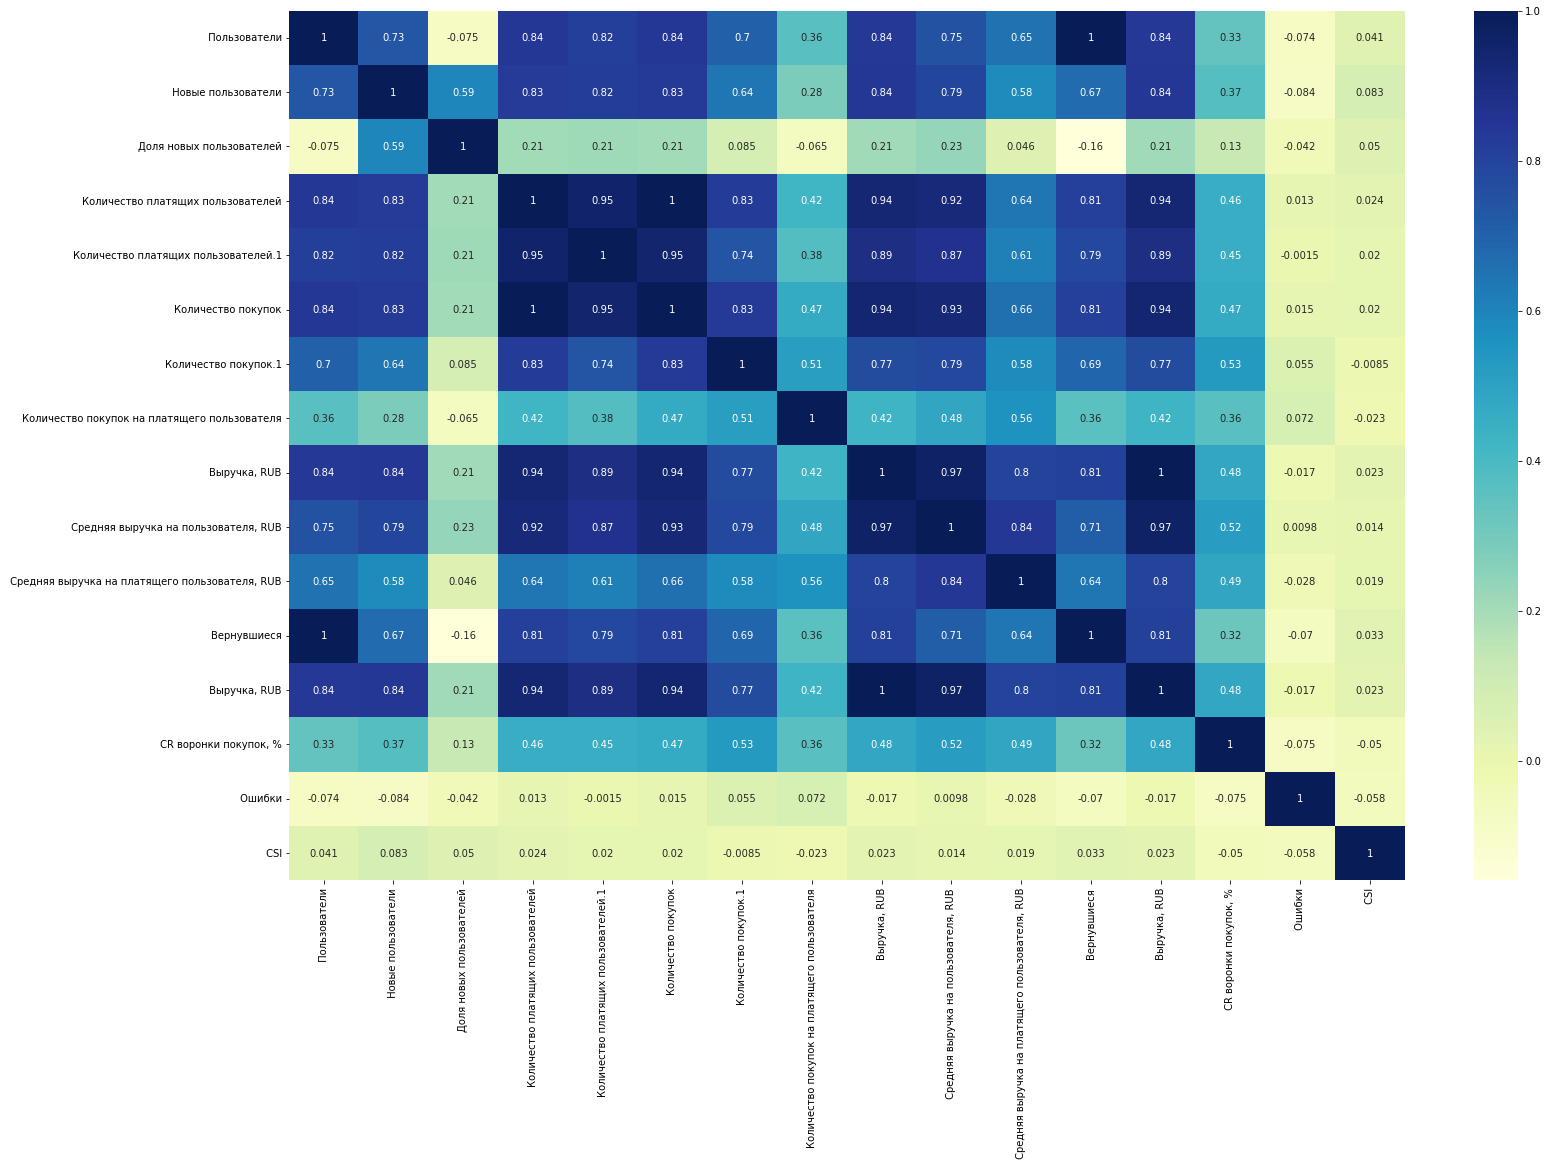

In [123]:
fig = plt.figure(figsize = (25, 16))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.show()

### Вывод:

##### На рост выручки сильнее всего влияют рост следующих показателей (по убыванию):
* Средняя выручка на пользователя
* Количество платящих пользователей и Количество покупок
* Количество пользователей (в т.ч. новых)
* Количество вернувшихся
* Средняя выручка на платящего пользователя


##### На рост выручки практически не влияет рост:
* Доли новых пользователей
* Количества покупок на платящего пользователя